# Lecture 13, Algebraic Modeling Languages

Algebraic Modeling Languages (AML) are high-level computer programming languages for describing and solving high complexity problems for large scale mathematical computation (i.e. large scale optimization type problems).  Their syntax mimics the mathematical notation of optimization problems, which allows one to express optimization problems in a familiar, concise and readable way. 

**AMLs do not directly solve the problem, but they call appropriate external solvers to find the solution.**

Examples of AMLs are
* <a href="http://ampl.com/">A Mathematical Programming Language (AMPL)</a>,
* <a href="https://www.gams.com/">General Algebraic Modeling System (GAMS)</a>,


* <a href="https://www.ibm.com/support/knowledgecenter/SSSA5P_12.5.0/ilog.odms.ide.help/OPL_Studio/maps/groupings/opl_Language.html">Optimization Programming Language (OPL)</a>,
* <a href="https://aimms.com/english/developers/resources/manuals/optimization-modeling/">Advanced Interactive Multidimensional Modeling System (AIMMS)</a>,
* <a href="https://developers.google.com/optimization/">Google OR-Tools</a>,
* <a href="http://www.pyomo.org/">Pyomo</a>, and
* <a href="http://www.pyopt.org/">pyOpt</a>.

In addition to the ease of modelling, one of the advantages of AMLs is that you can model the problem once and then solve it with multiple solvers.

## Pyomo

On this course, we use Pyomo as an example of AMLs. Pyomo is a Python-based, open-source optimization modeling language with a diverse set of optimization capabilities.

Pyomo may not be a completely typical AML, because Pyomo's modeling objects are embedded within a full-featured high-level programming language providing a rich set of supporting libraries, which distinguishes Pyomo from other AMLs.

Pyomo supports a wide range of problem types, including:
* Linear programming
* Quadratic programming
* Nonlinear programming
* Mixed-integer linear programming
* Mixed-integer quadratic programming
* Mixed-integer nonlinear programming
* Stochastic programming
* Generalized disjunctive programming
* Differential algebraic equations
* Bilevel programming
* Mathematical programs with equilibrium constraints

# Installing Pyomo

The easiest way to install Pyomo is to call
```
pip install pyomo
```
when pip has been installed on your machine.

## Example 1, linear optimization

Let us start with a very simple linear problem
$$
\begin{align}
\min &\qquad   2x_1+3x_2\\
\text{s.t. }& \qquad 3x_1+4x_2\geq 1\\
& \qquad x_1,x_2\geq 0.
\end{align}
$$

In [14]:
from pyomo.environ import *


model = ConcreteModel()

model.x = Var([1,2], domain=NonNegativeReals) #Non-negative variables x[1] and x[2]

model.OBJ = Objective(expr = 2*model.x[1] + 3*model.x[2]) #Objective function

model.Constraint1 = Constraint(expr = 3*model.x[1] + 4*model.x[2] >= 1) #Constraint

type(model)

pyomo.core.base.PyomoModel.ConcreteModel

Once we have defined the problem, we can solve it. Let us start by using glpk, which is an open source linear programming program.

You need to have glpk installed on your system. For details, see https://www.gnu.org/software/glpk/#TOCdownloading. For many Linux distributions, you can install glpk from the repositories by typing
```
sudo yum install glpk
```
```
sudo apt-get install glpk,
```
or whatever your distribution needs.


In [15]:
from pyomo.opt import SolverFactory #Import interfaces to solvers
opt = SolverFactory("glpk") #Use glpk
res = opt.solve(model, tee=True) #Solve the  problem and print the output
print("Solution:")
print("=========")
model.x.display() #Print values of x

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\jhaka\AppData\Local\Temp\tmpd4lqkmkh.glpk.raw --wglp C:\Users\jhaka\AppData\Local\Temp\tmpv_r0dksn.glpk.glp
 --cpxlp C:\Users\jhaka\AppData\Local\Temp\tmpifiy738i.pyomo.lp
Reading problem data from 'C:\Users\jhaka\AppData\Local\Temp\tmpifiy738i.pyomo.lp'...
2 rows, 3 columns, 3 non-zeros
21 lines were read
Writing problem data to 'C:\Users\jhaka\AppData\Local\Temp\tmpv_r0dksn.glpk.glp'...
15 lines were written
GLPK Simplex Optimizer, v4.65
2 rows, 3 columns, 3 non-zeros
Preprocessing...
1 row, 2 columns, 2 non-zeros
Scaling...
 A: min|aij| =  3.000e+00  max|aij| =  4.000e+00  ratio =  1.333e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 1
      0: obj =   0.000000000e+00 inf =   1.000e+00 (1)
      1: obj =   7.500000000e-01 inf =   0.000e+00 (0)
*     2: obj =   6.666666667e-01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0

Now, if you have other linear solvers installed on your system, you can use them too. Let us use <a href="http://www-03.ibm.com/software/products/en/ibmilogcpleoptistud">Cplex</a>, which is a commercial solver (academic license available).

In [16]:
opt = SolverFactory("cplex")
res = opt.solve(model, tee=True)
print("Solution:")
model.x.display()


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer Community Edition 12.9.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2019.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jhaka\AppData\Local\Temp\tmp1yhxt6hg.cplex.log' open.
CPLEX> Problem 'C:\Users\jhaka\AppData\Local\Temp\tmpd1gj21ss.pyomo.lp' read.
Read time = 0.00 sec. (0.00 ticks)
CPLEX> Problem name         : C:\Users\jhaka\AppData\Local\Temp\tmpd1gj21ss.pyomo.lp
Objective sense      : Minimize
Variables            :       3
Objective nonzeros   :       2
Linear constraints   :       2  [Greater: 1,  Equal: 1]
  Nonzeros           :       3
  RHS nonzeros       :       2

Variables            : Min LB: 0.0000000        Max UB: all infinite   
Objective nonzeros   : Min   : 2.000

We can use also <a href="http://www.gurobi.com/">gurobi</a>, which is another commercial solver with academic license.

In [17]:
opt = SolverFactory("gurobi")
res = opt.solve(model, tee=True)
print("Solution:")
model.x.display()

Using license file c:\MyTemp\local\opt\gurobi901\gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file C:\Users\jhaka\AppData\Local\Temp\tmpbu8z1kdb.pyomo.lp
Reading time = 0.00 seconds
x3: 2 rows, 3 columns, 3 nonzeros
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 2 rows, 3 columns and 3 nonzeros
Model fingerprint: 0x6bb7e864
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  6.666666667e-01
Solution:
x : Size=2, Index=x_index
    Key : Lower : Value              : Upper : Fixed : Stale : Domain
      1 :     0 : 0.3333333333333333 

## Example 2, nonlinear optimization

Let use define optimization problem
$$
\begin{align}
\max &\qquad c_b\\
\text{s.t. }& \qquad c_{af}s_v - s_vc_a-k_1c_a=0\\
&\qquad s_vc_b+k_1c_a-k_2c_b-2k_3c_a^2=0\\
&\qquad s_vc_c+k_2c_b=0\\
&\qquad s_vc_d+k_3c_a^2=0,\\
&\qquad s_v,c_a,c_b,c_c,c_d\geq0
\end{align}
$$
where $k_1=5/6$, $k_2=5/3$, $k_3=1/6000$, and $c_{af}=10000$.

In [18]:
from pyomo.environ import *
# create the concrete model
model = ConcreteModel()
# set the data 
k1 = 5.0/6.0 
k2 = 5.0/3.0 
k3 = 1.0/6000.0 
caf = 10000.0 
# create the variables
model.sv = Var(initialize = 1.0, within=PositiveReals)
model.ca = Var(initialize = 5000.0, within=PositiveReals)
model.cb = Var(initialize = 2000.0, within=PositiveReals)
model.cc = Var(initialize = 2000.0, within=PositiveReals)
model.cd = Var(initialize = 1000.0, within=PositiveReals)

# create the objective
model.obj = Objective(expr = model.cb, sense=maximize)
# create the constraints
model.ca_bal = Constraint(expr = (0 == model.sv * caf \
    - model.sv * model.ca - k1 * model.ca \
    - 2.0 * k3 * model.ca ** 2.0))
model.cb_bal = Constraint(expr=(0 == -model.sv * model.cb \
    + k1 * model.ca - k2 * model.cb))
model.cc_bal = Constraint(expr=(0 == -model.sv * model.cc \
    + k2 * model.cb))
model.cd_bal = Constraint(expr=(0 == -model.sv * model.cd \
    + k3 * model.ca ** 2.0))

## Solving with <a href="https://github.com/coin-or/Ipopt">Ipopt</a>

Install IPopt following https://coin-or.github.io/Ipopt/INSTALL.html.

**I was not able to install Ipopt now since there is a library that needs to be installed and I did not get a license for that.  I'll come back to this on next Monday's lecture**

## Solving with Baron
Install Baron following https://www.minlp.com/baron-downloads. *Note that Baron does not have a free academic license but only a free demo license that has limitations to the problem size that can be solved.*

In [19]:
opt = SolverFactory("baron",solver_io="nl")
#opt = SolverFactory("ipopt",solver_io="nl")

opt.solve(model,tee=True)

print("Solution is ")
model.sv.display()
model.ca.display()
model.cb.display()
model.cc.display()
model.cd.display()

 BARON version 19.12.7. Built: WIN-64 Sat Dec 7 15:08:51 EST 2019 

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 No BARON license file found in user PATH.  Continuing in demo mode.
 Model size is allowable within BARON demo size.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: ILOG CPLEX                                      
 For NLP: IPOPT, FILTERSD, FILTERSQP
 Doing local search
 Unable to find/load CPLEX library cplex12100.dll.
 Using CPLEX library cplex1290.dll.
 Preprocessing found feasible solution with value  1072.43720013     
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration    Open nodes  

# Black-box optimization using scipy.optimize

Often cases, you do not have algebraic formulations of the objective functions, but instead, you have an executable, which gives you the values and you do not know what is happening inside there.

### Example

Executable 'prob4' (which you need to compile before using) includes a script for two variable problem with three inequality constraints (where two of them involve only one variable). The problem is of the form
$$
\min \  f(x)
\\ \text{s.t. }g(x) \leq 2
\\          x\geq 0.
$$
The executable reads in a file 'input.txt', which contains variable values of $x_1$ and $x_2$ on top of each other and outputs a file "output.txt", which contains on top of each other value of f, value of g, gradient of f and gradient of the contraints.

Let us solve this problem using *scipy.optimize*


In [20]:
import csv
def evaluate_prob4(x):
    with open('input.txt','w') as f:
        f.write('%f\n%f'%(x[0],x[1])) #Write x[0] and x[1] to the input.txt file    
    !.\prob4 #Execute prob4
    val = []
    with open('output.txt','r') as f: 
        valuereader = csv.reader(f)
        for row in valuereader:
            val.extend([float(i) for i in row])
    f_val = val[0]
    g_val = [0]*3
    g_val[0] = 2-val[1]
    g_val[1]=val[2]
    g_val[2]=val[3]
    grad_f=[val[4],val[5]]
    grad_g = [[0,0],[0,0],[0,0]]
    grad_g[0] = [-val[6],-val[7]]
    grad_g[1] = [val[8],val[9]]
    grad_g[2] = [val[10],val[11]]
    return f_val,g_val,grad_f,grad_g
        

In [21]:
# test the connection
import math
print(evaluate_prob4([2.,0.]))
print(evaluate_prob4([3.,1.]))

(3.0, [-2.0, 2.0, 0.0], [-6.0, 2.0], [[-4.0, -0.0], [1.0, 1.0], [1.0, 1.0]])
(5.0, [-8.0, 3.0, 1.0], [1.0, 7.0], [[-6.0, -2.0], [1.0, 1.0], [1.0, 1.0]])


In [22]:
from scipy.optimize import minimize

# Formulate constraints for the minimize subroutine. Include also the gradients of the constraint
constraint_tuple=(
    {'type':'ineq','fun':lambda x:evaluate_prob4(x)[1][0],\
     'jac':lambda x:evaluate_prob4(x)[3][0]},
    {'type':'ineq','fun':lambda x:evaluate_prob4(x)[1][1],\
     'jac':lambda x:evaluate_prob4(x)[3][1]},
    {'type':'ineq','fun':lambda x:evaluate_prob4(x)[1][2],\
     'jac':lambda x:evaluate_prob4(x)[3][2]}
)

In [23]:
res = minimize(lambda x: evaluate_prob4(x)[0], [0,0], method='SLSQP'
                        , jac=lambda x: evaluate_prob4(x)[2], 
         constraints = constraint_tuple,options = {'disp':True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.54415
            Iterations: 34
            Function evaluations: 196
            Gradient evaluations: 30


In [25]:
print(res.x)
print(evaluate_prob4(res.x))

[ 1.41421428e+00 -6.64608399e-07]
(7.54415, [-1.000000000139778e-06, 1.414214, -1e-06], [-9.514717, 1.41421], [[-2.828428, 2e-06], [1.0, 1.0], [1.0, 1.0]])


# Example 3, Nonlinear multiobjective optimization

Let us study optimization problem related to a navigation

$$
\begin{align}
\min \ & \left(\sum_{i=1}^{48}\frac{\sqrt{1+x_i^2}}{v_i},\sum_{i=1}^{48}\left(\left(\frac{x_iv_i}{\sqrt{1+x_i^2}}+v_w\right)^2+\frac{v_i^2}{1+x_i^2}\right)\right., \\
&\qquad\left.\sum_{i=1}^{47}\big|x_{i+1}-x_i\big|\right)\\
\text{s.t. } & \sum_{i=1}^{j}x_i\leq -1\text{ for all }j=10,11,12,13,14\\
& \left|\sum_{i=1}^{j}x_i\right|\geq 2\text{ for all }j=20,21,22,23,24\\
& \sum_{i=1}^{j}x_i\geq 1\text{ for all }j=30,31,32,33,34\\
&\sum_{i=1}^{48}\frac{\sqrt{1+x_i^2}}{v_i} \leq 5\\
&\sum_{i=1}^{48}x_i=0\\
&-10\leq\sum_{i=1}^{j}x_i\leq10\text{ for all }j=1,\ldots,48
&0\leq v_i\leq 25\text{ for all }i=1,\ldots,48\\
&-10\leq x_i\leq 10\text{ for all }i=1,\ldots,48\\
\end{align}
$$

In [31]:
# Illustration of the problem
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def show_problem():
    path = [0 for i in range(6)] +  [-2 for i in range(5,17)] + [-5 for i in range(16,27)] \
        + [3 for i in range(26,42)] + [0 for i in range(41,49)]
    plt.plot(path,'r')
    currentAxis = plt.gca()
    plt.ylim(-10,10) 
    currentAxis.add_patch(Rectangle((10, -1),4,11))
    currentAxis.add_patch(Rectangle((20, -2),4,4))
    currentAxis.add_patch(Rectangle((30, -10),4,11))
    return plt

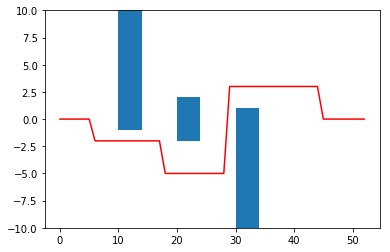

In [32]:
# "Go from point (0,0) to (50,0) avoiding the blue obstacles"
# Red path denotes a feasible solution
show_problem().show()

In [29]:

from pyomo.environ import *
# create the concrete model9
# utilize achievement scalarizing function in computing a PO solution for a given reference point 
def solve_ach(reference,lb,ub):
    model = ConcreteModel()

    vwind = 5.0
    min_speed = 0.01


    #f1, time used
    def f1(model):
        return sum([sqrt(1+model.y[i]**2)/model.v[i] for i in range(48)])
    #f2, wind drag, directly proportional to square of speed wrt. wind
    def f2(model):
        return sum([((model.y[i]*model.v[i])/sqrt(1+model.y[i]**2)+vwind)**2/
                    +model.v[i]**2*((1+model.y[i])**2) for i in range(48)])
    #f3, maximal course changes
    def f3(model):
        return sum([abs(model.y[i+1]-model.y[i]) for i in range(47)])

    def h1_rule(model,i): # first obstacle
        return sum(model.y[j] for j in range(i))<=-1
    def h2_rule(model,i): # second obstacle
        return abs(sum(model.y[j] for j in range(i)))>=2
    def h3_rule(model,i): # third obstacle
        return sum(model.y[j] for j in range(i))>=1
    def h4_rule(model):
        return sum([sqrt(1+model.y[i]**2)/model.v[i] for i in range(48)])<=25
    def h5_rule(model):
        return sum(model.y[i] for i in range(48))==0

    def f_rule(model):
        return t

    def y_init(model,i):
        if i==0:
            return -1
        if i==18:
            return -1
        if i==24:
            return 1
        if i==25:
            return 1
        if i==26:
            return 1
        if i==34:
            return -1
        return 0
    model.y = Var(range(48),bounds = (-10,10),initialize=y_init)
    model.v = Var(range(48),domain=NonNegativeReals,bounds=(min_speed,25),initialize=25)
    model.t = Var()
    model.h1=Constraint(range(9,14),rule=h1_rule) # first obstacle
    model.h2=Constraint(range(19,24),rule=h2_rule) # second obstacle
    model.h3=Constraint(range(29,34),rule=h3_rule) # third obstacle
    model.h4=Constraint(rule=h4_rule)
    model.h5=Constraint(rule=h5_rule)
    
    def h6_rule(model,i):
        return -10<=sum([model.y[j] for j in range(i)])<=10
    
    model.h6 = Constraint(range(1,48),rule=h6_rule)
    def t_con_f1_rule(model):
        return model.t>=(f1(model)-reference[0]-lb[0])/(ub[0]-lb[0]) # correnponds to first term in max
    model.t_con_f1 = Constraint(rule = t_con_f1_rule)
    def t_con_f2_rule(model):
        return model.t>=(f2(model)-reference[1]-lb[1])/(ub[1]-lb[1]) # correnponds to second term in max
    model.t_con_f2 = Constraint(rule = t_con_f2_rule)
    def t_con_f3_rule(model):
        return model.t>=(f3(model)-reference[2]-lb[2])/(ub[2]-lb[2]) # correnponds to third term in max
    model.t_con_f3 = Constraint(rule = t_con_f3_rule)
    model.f = Objective(expr = model.t+1e-10*(f1(model)+f2(model)+f3(model))) # t + augmentation term
    tee =True
    opt = SolverFactory("baron",solver_io="nl")
#    opt = SolverFactory("ipopt",solver_io="nl")
    opt.options.max_iter=10000
#    opt.options.constr_viol_tol=0.01
    #opt.options.halt_on_ampl_error = "yes"

    opt.solve(model,tee=tee)
    return [[value(f1(model)),value(f2(model)),value(f3(model))],[model.y,model.v]]


In [30]:
# Compute ideal and nadir points
lb_ = [0,0,0]
ub_ = [1,1,1]
values =[]
for i in range(3):
    reference = [1e10,1e10,1e10]
    reference[i]=0
    # use a reference point where f_i is the only one that we are interested in
    values.append(solve_ach(reference,lb_,ub_)[0])
print(values)

    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    function to express ranged inequality expressions.
    functi

ValueError: Cannot load a SolverResults object with bad status: aborted

**Baron demo licence not able to solve this problem because it has too many variables and constraints!**

Let's get back to this on next Monday's lecture and solve the problem with Ipopt.

In [ ]:
#Use a payoff table to compute ideal nad nadir 
lb = [0,0,0]
ub = [1,1,1]
for i in range(3):
    lb[i] = min([values[j][i] for j in range(3)])
    ub[i] = max([values[j][i] for j in range(3)])
print(lb)
print(ub)

In [ ]:
# use solve_ach to compute different Pareto optimal solutions based on a given reference point
[f,x] = solve_ach([(a+b)/2 for (a,b) in zip(lb,ub)],lb,ub) #Compromise solution
#[f,x] = solve_ach([1e10,1e10,0],lb,ub) #Minimize the third objective (maximal course changes)


In [ ]:
# PLot solutions 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def visualize(x):
    plt.plot([sum(value(x[0][j]) for j in range(i)) for i in range(49)])
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((10, -1),4,11))
    currentAxis.add_patch(Rectangle((20, -2),4,4))
    currentAxis.add_patch(Rectangle((30, -10),4,11))
    return plt

In [ ]:
visualize(x).show()